In [1]:
!pip install watermark

In [2]:
%load_ext watermark
%watermark -a "Ishan Dahal" -u -d -p numpy,tensorflow,tensorflow_datasets,matplotlib,scipy

Ishan Dahal 
last updated: 2020-08-12 

numpy 1.18.5
tensorflow 2.3.0
tensorflow_datasets 2.1.0
matplotlib 3.2.2
scipy 1.4.1


In [3]:
import tensorflow as tf
import numpy as np
import imageio

In [4]:
def conv1d(x, w, p=0, s=1):
    w_rot = np.array(w[::-1])
    x_padded = np.array(x)
    if p > 0:
        zero_pad = np.zeros(shape=p)
        x_padded = np.concatenate([zero_pad, x_padded, zero_pad])
    res = []
    for i in range(0, int((len(x_padded) - len(w_rot)) / s) +1, s):
        res.append(np.sum(x_padded[i:i+w_rot.shape[0]] * w_rot))
    return np.array(res)

#Testing 
x = [1, 3, 2, 4, 5, 6, 1, 3]
w = [1, 0, 3, 1, 2]

print('Conv1d Implementation:', conv1d(x, w, p=2, s=1))

print('Numpy Results:',  np.convolve(x, w, mode='same'))


Conv1d Implementation: [ 5. 14. 16. 26. 24. 34. 19. 22.]
Numpy Results: [ 5 14 16 26 24 34 19 22]


In [5]:
import scipy.signal

def conv2d(X, W, p=(0, 0), s=(1, 1)):
    W_rot = np.array(W)[::-1, ::-1]
    X_orig = np.array(X)
    n1 = X_orig.shape[0] + 2*p[0]
    n2 = X_orig.shape[1] + 2*p[1]
    X_padded = np.zeros(shape=(n1, n2))
    X_padded[p[0]:p[0]+X_orig.shape[0],
             p[1]:p[1]+X_orig.shape[1]] = X_orig

    res = []
    for i in range(0, int((X_padded.shape[0] - 
                           W_rot.shape[0]) / s[0]) +1, s[0]):
        res.append([])
        for j in range(0, int((X_padded.shape[1] -
                               W_rot.shape[1]) / s[1]) +1, s[1]):
            X_sub = X_padded[i:i+W_rot.shape[0],
                             j:j+W_rot.shape[1]]
            res[-1].append(np.sum(X_sub * W_rot))
    return (np.array(res))

X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]

print('Conv2d Implementation:\n',
        conv2d(X, W, p=(1, 1), s=(1, 1)))

print('SciPY Results:\n',
      scipy.signal.convolve2d(X, W, mode='same'))

Conv2d Implementation:
 [[11. 25. 32. 13.]
 [19. 25. 24. 13.]
 [13. 28. 25. 17.]
 [11. 17. 14.  9.]]
SciPY Results:
 [[11 25 32 13]
 [19 25 24 13]
 [13 28 25 17]
 [11 17 14  9]]


In [6]:
img_raw = tf.io.read_file('/content/drive/My Drive/DATA/Sample Images/example-image.png')
img= tf.image.decode_image(img_raw)
print('Image shape:', img.shape)

Image shape: (252, 221, 3)


In [7]:
img = imageio.imread('/content/drive/My Drive/DATA/Sample Images/example-image.png')
print('Image shape:', img.shape)
print('Number of channels:', img.shape[2])
print('Image data type:', img.dtype)
print(img[100:102, 100:102, :])

Image shape: (252, 221, 3)
Number of channels: 3
Image data type: uint8
[[[179 134 110]
  [182 136 112]]

 [[180 135 111]
  [182 137 113]]]


In [8]:
from tensorflow import keras
conv_layer = keras.layers.Conv2D(
    filters=16, kernel_size=(3, 3),
    kernel_regularizer=keras.regularizers.l2(0.001))

fc_layer = keras.layers.Dense(
    units=16, kernel_regularizer=keras.regularizers.l2(0.001))

In [9]:
##Binary Crossentropy
bce_probas = tf.keras.losses.BinaryCrossentropy(from_logits=False)
bce_logits = tf.keras.losses.BinaryCrossentropy(from_logits=True)


In [10]:
logits = tf.constant([0.8])
probas = tf.keras.activations.sigmoid(logits)

tf.print(
    'BCE (w Probas): {:.4f}'.format(
        bce_probas(y_true=[1], y_pred=probas)),
        '(w Logits): {:.4f}'.format(
            bce_logits(y_true=[1], y_pred=logits)))

BCE (w Probas): 0.3711 (w Logits): 0.3711


In [11]:
### Categorical Crossentropy
cce_probas = tf.keras.losses.CategoricalCrossentropy(
    from_logits=False)
cce_logits = tf.keras.losses.CategoricalCrossentropy(
    from_logits=True)

logits = tf.constant([[1.5, 0.8, 2.1]])
probas = tf.keras.activations.softmax(logits)

tf.print(
    'CCE (w Probas): {:.4f}'.format(
        cce_probas(y_true=[[0, 0, 1]], y_pred=probas)),
    '(w Logits): {:.4f}'.format(
        cce_logits(y_true=[[0, 0, 1]], y_pred=logits)))

CCE (w Probas): 0.5996 (w Logits): 0.5996


In [12]:
##Sparse Categorical Crossentropy
sp_cce_probas = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False
)
sp_cce_logits = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True
)

tf.print(
    'Sparse CCE (w probas): {:.4f}'.format(
        sp_cce_probas(y_true=[2], y_pred=probas)
    ),
    '(w Logits): {:.4f}'.format(
        sp_cce_logits(y_true=[2], y_pred=logits)
    )
)

Sparse CCE (w probas): 0.5996 (w Logits): 0.5996


# Using CNN to recognize digits.

In [13]:
import tensorflow_datasets as tfds

mnist_bldr = tfds.builder('mnist')
mnist_bldr.download_and_prepare()
datasets = mnist_bldr.as_dataset(shuffle_files=False)
mnist_train_orig = datasets['train']
mnist_test_orig = datasets['test']

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


In [14]:
buffer_size = 10000
batch_size = 64
num_epochs = 20

In [15]:
mnist_train = mnist_train_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32) / 255.0,
                  tf.cast(item['label'], tf.int32))
)

mnist_test = mnist_test_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32) /255.0,
                  tf.cast(item['label'], tf.int32))
)

In [16]:
tf.random.set_seed(1)

mnist_train = mnist_train.shuffle(buffer_size=buffer_size,
                                  reshuffle_each_iteration=False)
mnist_valid = mnist_train.take(10000).batch(batch_size)
mnist_train = mnist_train.skip(10000).batch(batch_size)

In [17]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    data_format='channels_last',
    name='conv_1', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_1'))

model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_2', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

In [18]:
model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 7, 7, 64])

In [19]:
model.add(tf.keras.layers.Flatten())

model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 3136])

In [20]:
model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1',
    activation='relu'))
model.add(tf.keras.layers.Dropout
    (rate=0.5))

model.add(tf.keras.layers.Dense(
    units=10, name='fc_2',
    activation='softmax'
))

In [21]:
tf.random.set_seed(1)
model.build(input_shape=(None, 28, 28, 1))

model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 10])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 14, 14, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 14, 14, 64)        51264     
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
fc_1 (Dense)                 (None, 1024)              3212288   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(mnist_train, epochs=num_epochs,
                    validation_data=mnist_valid, shuffle=True)

Epoch 1/20
782/782 [==============================] - 12s 15ms/step - loss: 0.1377 - accuracy: 0.9575 - val_loss: 0.0505 - val_accuracy: 0.9842
Epoch 2/20
782/782 [==============================] - 11s 14ms/step - loss: 0.0449 - accuracy: 0.9863 - val_loss: 0.0390 - val_accuracy: 0.9885
Epoch 3/20
782/782 [==============================] - 11s 15ms/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0395 - val_accuracy: 0.9875
Epoch 4/20
782/782 [==============================] - 11s 14ms/step - loss: 0.0213 - accuracy: 0.9936 - val_loss: 0.0367 - val_accuracy: 0.9896
Epoch 5/20
782/782 [==============================] - 11s 15ms/step - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0.0425 - val_accuracy: 0.9891
Epoch 6/20
782/782 [==============================] - 12s 15ms/step - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.0374 - val_accuracy: 0.9902
Epoch 7/20
782/782 [==============================] - 11s 15ms/step - loss: 0.0138 - accuracy: 0.9959 - val_loss: 0.0394 - val_accuracy:

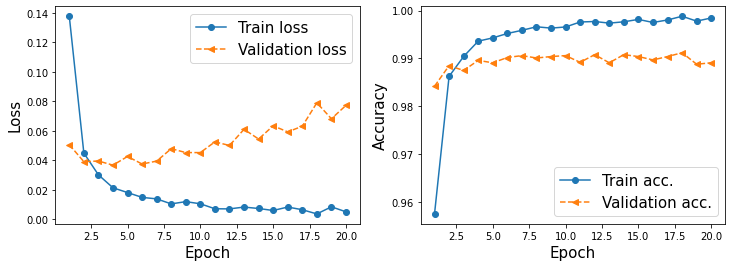

In [25]:

import matplotlib.pyplot as plt

hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/15_12.png', dpi=300)
plt.show()



In [28]:
test_result = model.evaluate(mnist_test.batch(20))
print('\nTest Acc. {:.2f}'.format(test_result[1]*100))

500/500 [==============================] - 2s 5ms/step - loss: 0.0478 - accuracy: 0.9913

Test Acc. 99.13


TensorShape([12, 10])
tf.Tensor([2 0 4 8 7 6 0 6 3 1 8 0], shape=(12,), dtype=int64)


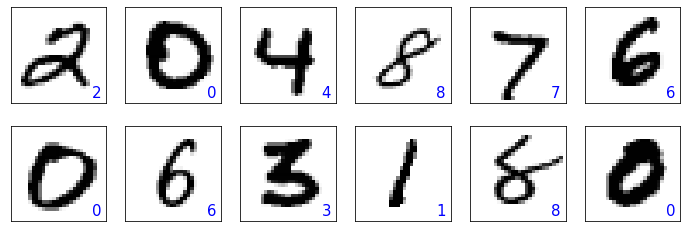

In [33]:
batch_test = next(iter(mnist_test.batch(12)))

preds = model(batch_test[0])

tf.print(preds.shape)
preds = tf.argmax(preds, axis=1)
print(preds)

fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = batch_test[0][i, :, :, 0]
    ax.imshow(img, cmap='gray_r')
    ax.text(0.9, 0.1, '{}'.format(preds[i]),
            size=15, color='blue',
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)
plt.show()